# Dataset Link

1. Link:- https://www.kaggle.com/datasets/salader/dogs-vs-cats?select=train

In [ ]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:08<00:00, 227MB/s]
100% 1.06G/1.06G [00:08<00:00, 128MB/s]


In [ ]:
!unzip /content/dogs-vs-cats.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

# Installing the required libraries

In [ ]:
!pip3 install tensorflow numpy matplotlib keras

# Importing Packages

In [ ]:
# Standard library for generating random numbers
import random

# Standard library for interacting with the operating system
import os

# Popular library for numerical operations in Python
import numpy as np

# Library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

# Library for opening, manipulating, and saving many different image file formats
from PIL import Image

# Open-source library for machine learning developed by Google
import tensorflow as tf

# Submodules from TensorFlow for building neural network layers and models
from tensorflow.keras import layers, models

# Submodule for image augmentation and preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Functions for converting images to arrays and loading images from files
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Library for visualizing Keras model architectures
from keras.utils import plot_model

# Libraries from scikit-learn for evaluating classification models
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Reading the data

In [ ]:
os.listdir("/content/dogs_vs_cats/train/cats")

['cat.286.jpg',
 'cat.9871.jpg',
 'cat.1624.jpg',
 'cat.5387.jpg',
 'cat.6634.jpg',
 'cat.10366.jpg',
 'cat.5047.jpg',
 'cat.11734.jpg',
 'cat.4985.jpg',
 'cat.105.jpg',
 'cat.11050.jpg',
 'cat.4343.jpg',
 'cat.11317.jpg',
 'cat.7868.jpg',
 'cat.617.jpg',
 'cat.4639.jpg',
 'cat.10933.jpg',
 'cat.3687.jpg',
 'cat.6383.jpg',
 'cat.6169.jpg',
 'cat.2323.jpg',
 'cat.11701.jpg',
 'cat.7248.jpg',
 'cat.5699.jpg',
 'cat.952.jpg',
 'cat.3404.jpg',
 'cat.10993.jpg',
 'cat.8879.jpg',
 'cat.1004.jpg',
 'cat.4294.jpg',
 'cat.8730.jpg',
 'cat.3060.jpg',
 'cat.9775.jpg',
 'cat.11237.jpg',
 'cat.4835.jpg',
 'cat.446.jpg',
 'cat.4769.jpg',
 'cat.1873.jpg',
 'cat.11630.jpg',
 'cat.10381.jpg',
 'cat.9596.jpg',
 'cat.5039.jpg',
 'cat.272.jpg',
 'cat.7234.jpg',
 'cat.4954.jpg',
 'cat.2573.jpg',
 'cat.3812.jpg',
 'cat.6687.jpg',
 'cat.7799.jpg',
 'cat.2496.jpg',
 'cat.11773.jpg',
 'cat.4002.jpg',
 'cat.6511.jpg',
 'cat.2446.jpg',
 'cat.96.jpg',
 'cat.7198.jpg',
 'cat.4588.jpg',
 'cat.4638.jpg',
 'cat.4394.

In [ ]:
#Printing 9 random sample images
random.sample(os.listdir("/content/dogs_vs_cats/train/cats"), 9)

['cat.3028.jpg',
 'cat.4377.jpg',
 'cat.7242.jpg',
 'cat.5938.jpg',
 'cat.335.jpg',
 'cat.12050.jpg',
 'cat.4356.jpg',
 'cat.4164.jpg',
 'cat.8696.jpg']

In [ ]:
def plot_images_from_directory(directory_path, class_animal, num_images=9):
    # Retrieve list of all file names in the directory
    image_filenames = os.listdir(directory_path)

    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)

    # Randomly select 'num_images' number of file names
    selected_images = random.sample(image_filenames, num_images)

    # Plotting the images
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # Adjust the size as needed
    axes = axes.ravel()

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(directory_path, image_file)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {class_animal}")
        axes[i].axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

Let's go through the code line by line and explain each part:

```python
def plot_images_from_directory(directory_path, class_animal, num_images=9):
```
- This line defines a function named `plot_images_from_directory` that takes three parameters:
  - `directory_path`: The path to the directory containing the images.
  - `class_animal`: A string representing the class of the animal (used for titling the images).
  - `num_images`: The number of images to display (default is 9).

```python
    # Retrieve list of all file names in the directory
    image_filenames = os.listdir(directory_path)
```
- This line retrieves a list of all file names in the specified directory using `os.listdir(directory_path)` and stores it in the variable `image_filenames`.

```python
    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)
```
- This block checks if the number of images in the directory is less than the requested number of images (`num_images`).
- If there are fewer images, it prints a message indicating how many images were found and sets `num_images` to the total number of images found.

```python
    # Randomly select 'num_images' number of file names
    selected_images = random.sample(image_filenames, num_images)
```
- This line randomly selects `num_images` file names from the `image_filenames` list using `random.sample()` and stores them in the variable `selected_images`.

```python
    # Plotting the images
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # Adjust the size as needed
    axes = axes.ravel()
```
- This block creates a 3x3 grid of subplots for displaying the images using `plt.subplots(3, 3, figsize=(8, 8))`.
- The `figsize` parameter sets the size of the figure.
- `axes.ravel()` flattens the 2D array of axes into a 1D array to simplify indexing.

```python
    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(directory_path, image_file)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {class_animal}")
        axes[i].axis('off')  # Hide the axis
```
- This block loops over the selected images using `enumerate(selected_images)`, which provides both the index (`i`) and the file name (`image_file`).
- Inside the loop:
  - `image_path` is constructed by joining the `directory_path` and `image_file`.
  - The image is opened using `Image.open(image_path)`.
  - The image is displayed in the `i`-th subplot using `axes[i].imshow(image)`.
  - The title of the subplot is set to the class of the animal using `axes[i].set_title(f"Image: {class_animal}")`.
  - The axis is hidden using `axes[i].axis('off')`.

```python
    plt.tight_layout()
    plt.show()
```
- `plt.tight_layout()` adjusts the spacing between subplots to prevent overlap.
- `plt.show()` displays the plot with the images.

In summary, this function retrieves a specified number of random images from a directory, and plots them in a 3x3 grid with titles indicating the class of the animal. If there are fewer images in the directory than requested, it displays all available images.

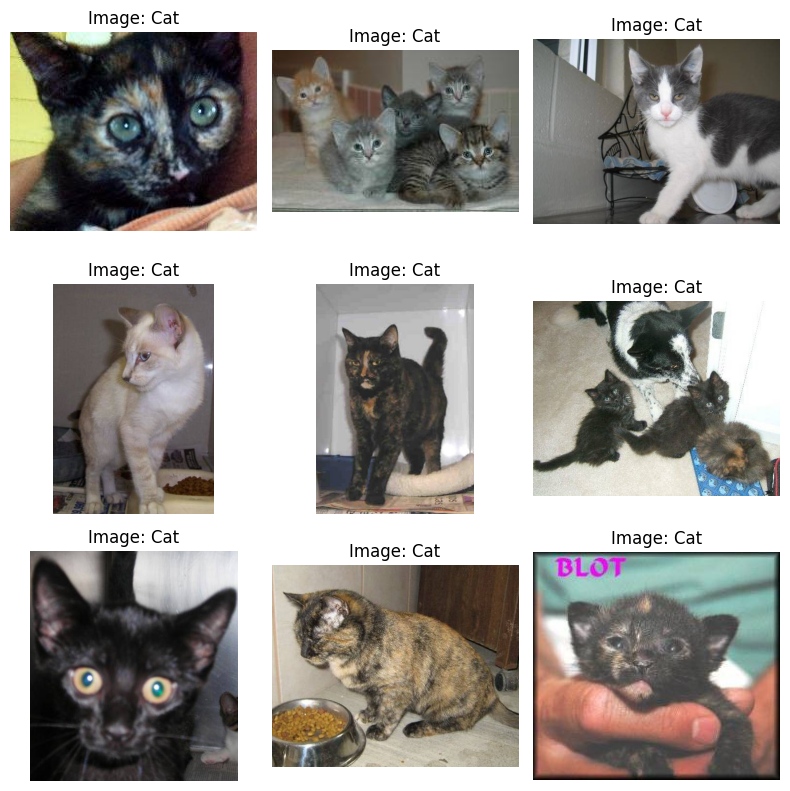

In [ ]:
# Placeholder for the directory path
cat_directory_path = '/content/dogs_vs_cats/train/cats'  # Replace with your directory path
plot_images_from_directory(cat_directory_path, class_animal = 'Cat')

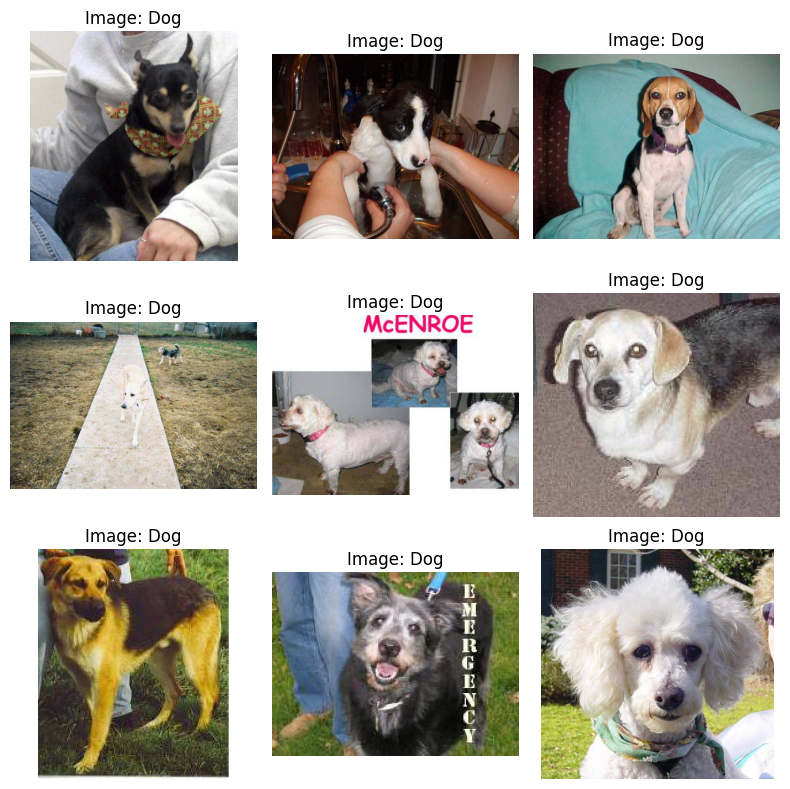

In [ ]:
dog_directory_path = "/content/dogs_vs_cats/train/dogs"
plot_images_from_directory(dog_directory_path, class_animal = 'Dog')

In [ ]:
classes_animals = ["Cats", "Dogs"]

cat_images = os.listdir(cat_directory_path)
dog_images = os.listdir(dog_directory_path)

count = [len(cat_images), len(dog_images)]

print(count)

[10000, 10000]


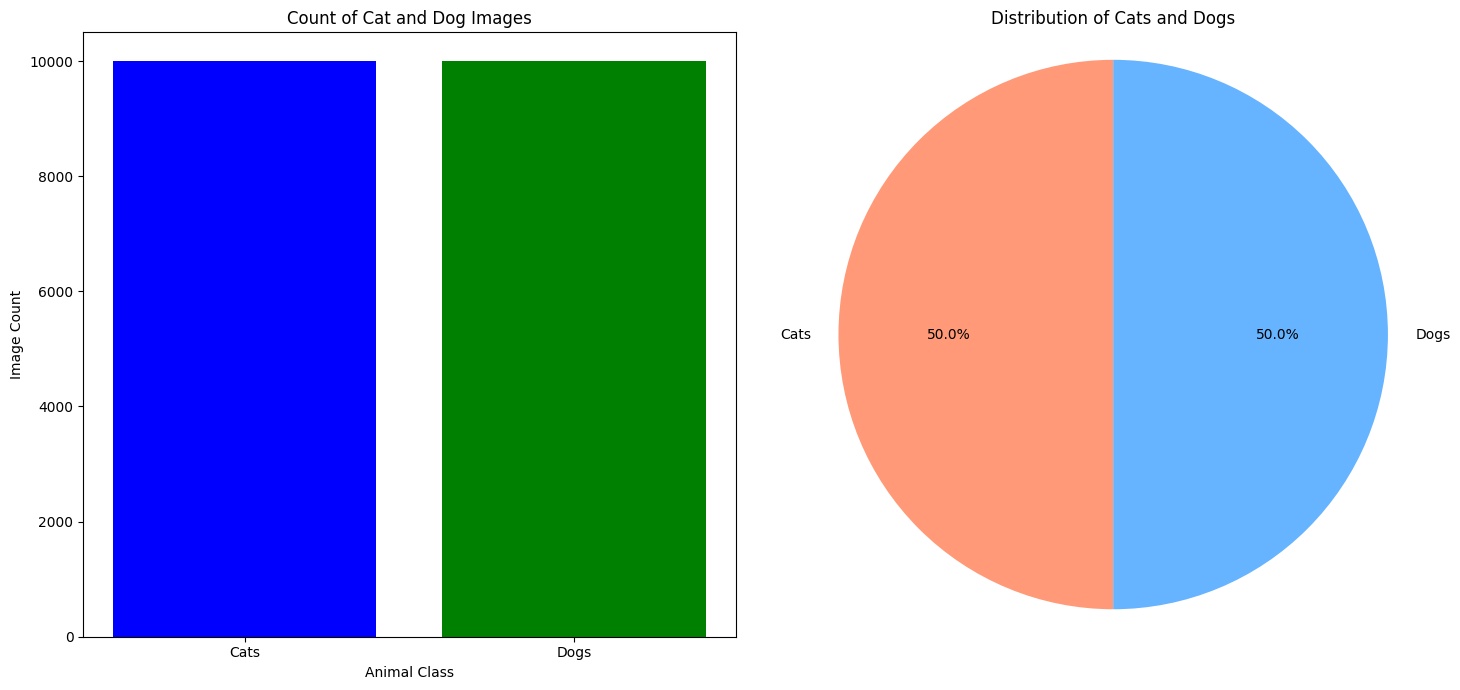

In [ ]:
# Creating both a bar chart and a pie chart side by side in a single figure

# Setting up a figure and axes for two subplots: one for the bar chart, one for the pie chart

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Bar chart on the first subplot
ax[0].bar(classes_animals, count, color=['blue', 'green'])
ax[0].set_xlabel('Animal Class')
ax[0].set_ylabel('Image Count')
ax[0].set_title('Count of Cat and Dog Images')

# Pie chart on the second subplot
colors = ['#ff9977','#66b3ff']
ax[1].pie(count, labels=classes_animals, colors=colors, autopct='%1.1f%%', startangle=90)
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax[1].set_title('Distribution of Cats and Dogs')

# Adjusting the spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

## **Loading Shapes and Channels Using OpenCV**

array([[[107, 139, 175],
        [107, 139, 175],
        [108, 140, 176],
        ...,
        [ 70,  62,  69],
        [ 70,  62,  69],
        [ 70,  62,  69]],

       [[107, 139, 175],
        [107, 139, 175],
        [108, 140, 176],
        ...,
        [ 72,  64,  71],
        [ 72,  64,  71],
        [ 72,  64,  71]],

       [[107, 139, 175],
        [107, 139, 175],
        [108, 140, 176],
        ...,
        [ 74,  66,  73],
        [ 74,  66,  73],
        [ 74,  66,  73]],

       ...,

       [[ 76, 133, 185],
        [ 80, 137, 189],
        [ 85, 142, 194],
        ...,
        [ 59, 109, 161],
        [ 61, 111, 163],
        [ 62, 112, 164]],

       [[ 92, 149, 201],
        [ 92, 149, 201],
        [ 92, 149, 201],
        ...,
        [ 57, 107, 159],
        [ 57, 107, 159],
        [ 57, 107, 159]],

       [[ 79, 136, 188],
        [ 79, 136, 188],
        [ 81, 138, 190],
        ...,
        [ 68, 118, 170],
        [ 67, 117, 169],
        [ 65, 115, 167]]], dtype=uint8)
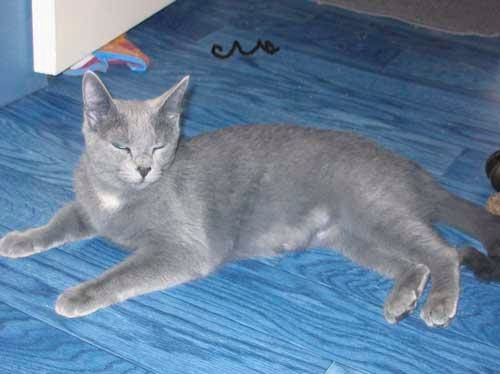

In [ ]:
import cv2
# In the case of color images, the decoded images will have the channels stored in B G R order.
cv2.imread("/content/train/cats/cat.10008.jpg")

In [ ]:
image = "/content/train/cats/cat.10008.jpg"

img = cv2.imread(image)

# If the image is loaded successfully, print its pixel values
if img is not None:
    print(img)
    print("This is the Shape of the image = ",img.shape)
else:
    print("The image could not be loaded. Please check the path and file permissions.")

[[[107 139 175]
  [107 139 175]
  [108 140 176]
  ...
  [ 70  62  69]
  [ 70  62  69]
  [ 70  62  69]]

 [[107 139 175]
  [107 139 175]
  [108 140 176]
  ...
  [ 72  64  71]
  [ 72  64  71]
  [ 72  64  71]]

 [[107 139 175]
  [107 139 175]
  [108 140 176]
  ...
  [ 74  66  73]
  [ 74  66  73]
  [ 74  66  73]]

 ...

 [[ 76 133 185]
  [ 80 137 189]
  [ 85 142 194]
  ...
  [ 59 109 161]
  [ 61 111 163]
  [ 62 112 164]]

 [[ 92 149 201]
  [ 92 149 201]
  [ 92 149 201]
  ...
  [ 57 107 159]
  [ 57 107 159]
  [ 57 107 159]]

 [[ 79 136 188]
  [ 79 136 188]
  [ 81 138 190]
  ...
  [ 68 118 170]
  [ 67 117 169]
  [ 65 115 167]]]
This is the Shape of the image =  (374, 500, 3)


In [ ]:
for i,j,k in os.walk('/content/dogs_vs_cats'):
    print(i,j,k)

/content/dogs_vs_cats ['test', 'train'] []
/content/dogs_vs_cats/test ['cats', 'dogs'] []
/content/dogs_vs_cats/test/cats [] ['cat.7592.jpg', 'cat.5189.jpg', 'cat.2399.jpg', 'cat.8746.jpg', 'cat.432.jpg', 'cat.7883.jpg', 'cat.1322.jpg', 'cat.12138.jpg', 'cat.2104.jpg', 'cat.5229.jpg', 'cat.4867.jpg', 'cat.5872.jpg', 'cat.6256.jpg', 'cat.6884.jpg', 'cat.8783.jpg', 'cat.3576.jpg', 'cat.11444.jpg', 'cat.6105.jpg', 'cat.7366.jpg', 'cat.4392.jpg', 'cat.10207.jpg', 'cat.10915.jpg', 'cat.5416.jpg', 'cat.1163.jpg', 'cat.4505.jpg', 'cat.1968.jpg', 'cat.12391.jpg', 'cat.10412.jpg', 'cat.7316.jpg', 'cat.7915.jpg', 'cat.5626.jpg', 'cat.6865.jpg', 'cat.1967.jpg', 'cat.7048.jpg', 'cat.5295.jpg', 'cat.6479.jpg', 'cat.9799.jpg', 'cat.3036.jpg', 'cat.8289.jpg', 'cat.7284.jpg', 'cat.2368.jpg', 'cat.1228.jpg', 'cat.11938.jpg', 'cat.1750.jpg', 'cat.4380.jpg', 'cat.5118.jpg', 'cat.9980.jpg', 'cat.3579.jpg', 'cat.705.jpg', 'cat.151.jpg', 'cat.6158.jpg', 'cat.10526.jpg', 'cat.11257.jpg', 'cat.1647.jpg', 'cat

## **Building Model**

**ImageDataGenerator Documentation** =
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

**Setting Up Image Data Generator with Rescaling and Validation Split**

This code snippet sets the path to the dataset and configures an ImageDataGenerator to rescale image pixel values and split the dataset, reserving 20% of the data for validation purposes.

In [ ]:
# Set path to the dataset
base_dir = "/content/dogs_vs_cats/train"

# All images will be rescaled by 1./255
# Using 20% of data for validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

**Creating Training and Validation Data Generators for Image Classification**

This code sets up data generators for training and validation datasets using image data from a specified directory. The images are resized to 150x150 pixels, grouped into batches of 20, and labeled for binary classification.

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150), # Resizing images to 150x150
    batch_size=20,
    class_mode='binary', # Since we use binary_crossentropy loss, we need binary labels
    subset='training' # Set as training data
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150), # Resizing images to 150x150
    batch_size=20,
    class_mode='binary', # Since we use binary_crossentropy loss, we need binary labels
    subset='validation' # Set as validation data
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


**Accessing and Printing Class Labels for Training and Validation Data**

This code retrieves and prints the class indices (labels) for the training and validation datasets from the respective data generators

In [ ]:
# Accessing class labels for the training data
train_class_labels = train_generator.class_indices
print('Training class Labels',train_class_labels)
# Accessing class labels for the validation data
validation_class_labels = validation_generator.class_indices
print('Validation class Labels',validation_class_labels)

Training class Labels {'cats': 0, 'dogs': 1}
Validation class Labels {'cats': 0, 'dogs': 1}


## Visualising the Batch Images

In [ ]:
images, labels = next(train_generator)
images, labels

(array([[[[0.7490196 , 0.78823537, 0.8352942 ],
          [0.7019608 , 0.7411765 , 0.78823537],
          [0.69411767, 0.73333335, 0.7803922 ],
          ...,
          [0.40784317, 0.3372549 , 0.32941177],
          [0.3137255 , 0.23529413, 0.20784315],
          [0.2784314 , 0.21176472, 0.18039216]],
 
         [[0.7686275 , 0.8000001 , 0.85098046],
          [0.7411765 , 0.7725491 , 0.8235295 ],
          [0.6666667 , 0.69803923, 0.7490196 ],
          ...,
          [0.37647063, 0.31764707, 0.30588236],
          [0.2784314 , 0.20392159, 0.18039216],
          [0.27450982, 0.20784315, 0.18039216]],
 
         [[0.7960785 , 0.8196079 , 0.8745099 ],
          [0.8078432 , 0.8313726 , 0.8862746 ],
          [0.69803923, 0.72156864, 0.77647066],
          ...,
          [0.32941177, 0.27058825, 0.2509804 ],
          [0.31764707, 0.2509804 , 0.22352943],
          [0.29411766, 0.23529413, 0.21568629]],
 
         ...,
 
         [[0.08235294, 0.08627451, 0.06666667],
          [0.07058

**Function to Plot Images and Their Labels from Data Generator**

This code defines and uses a function to plot a specified number of images and their corresponding labels from an image data generator.

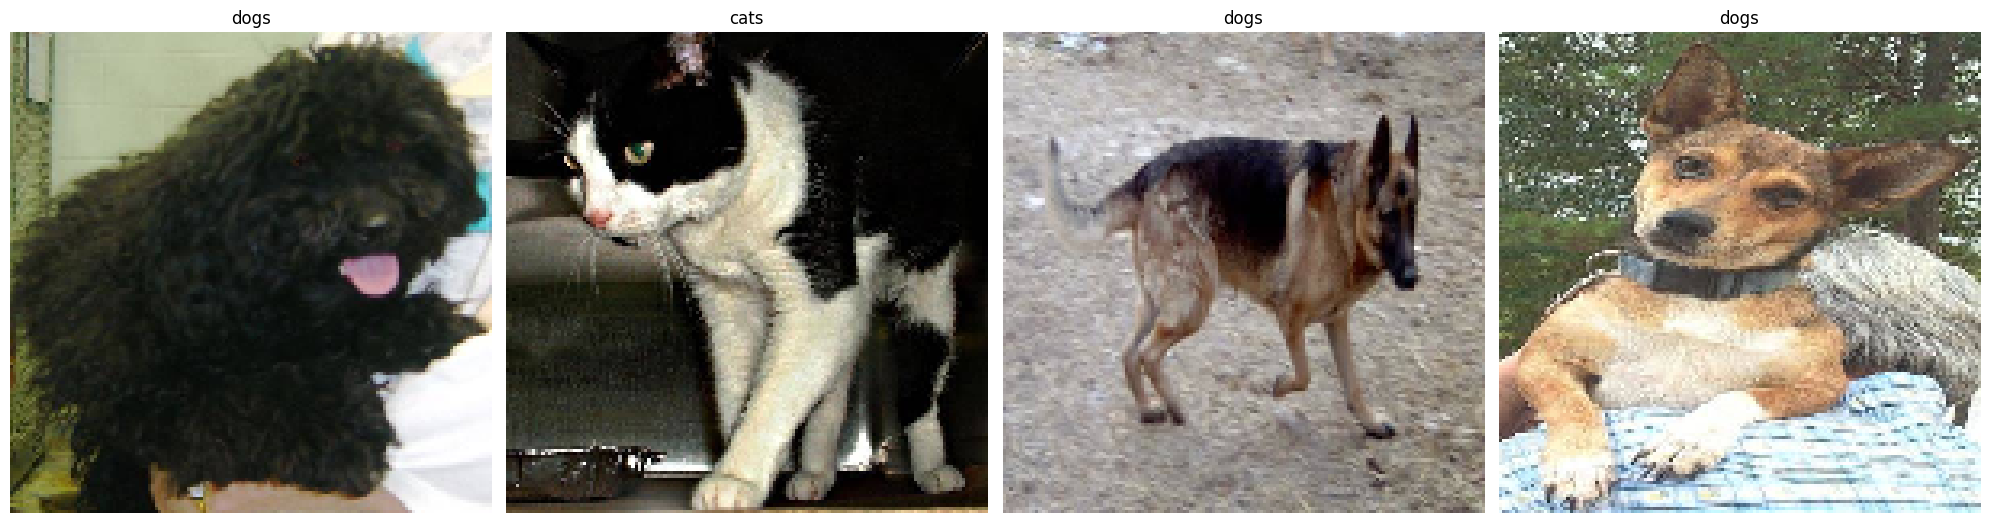

In [ ]:
import matplotlib.pyplot as plt

# Function to plot images and their labels
def plot_images_from_generator(generator, num_images=4):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Set up the plot
    fig, axes = plt.subplots(1, num_images, figsize=(20,20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        # Image preprocessing might differ, adjust accordingly
        ax.imshow(img)
        # Set the title to the class label
        # Inverse the class indices dictionary to get class names from labels
        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Now, call this function with your training generator
plot_images_from_generator(train_generator, num_images=4)

In [ ]:
train_generator.reset()

# Basic CNN Model

**Building and Summarizing a Convolutional Neural Network Model for Binary Classification**

This code constructs a sequential convolutional neural network (CNN) model using TensorFlow/Keras and prints its summary. The model is designed for binary classification, using several convolutional and pooling layers, followed by fully connected (dense) layers.



In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 17, 17, 128)      

**Visualizing and Saving the Model Architecture**

This code visualizes the architecture of the previously defined convolutional neural network (CNN) model and saves the visualization as an image file named 'Architecture.png'. The visualization includes the shapes of the layers and their names.

In [ ]:
plot_model(model, to_file = 'Architecture.png', show_shapes=True, show_layer_names=True)

## Parameter Calculation in CNN Layers

### Conv2D Layer

The formula to calculate the number of parameters in a Conv2D layer is:

$$\text{Parameters} = (\text{kernel\_height} \times \text{kernel\_width} \times \text{input\_channels} + 1) \times \text{number\_of\_filters}$$

The "+1" accounts for the bias term for each filter.

#### 1. First Conv2D Layer

- Input shape: (150, 150, 3)
- Number of filters: 32
- Filter size: (3, 3)
- Parameters: $$(3 \times 3 \times 3 + 1) \times 32 = 896$$

#### 2. Second Conv2D Layer

- Input channels: 32 (from the previous Conv2D layer)
- Number of filters: 64
- Filter size: (3, 3)
- Parameters: $$(3 \times 3 \times 32 + 1) \times 64 = 18,496$$

#### 3. Third Conv2D Layer

- Input channels: 64
- Number of filters: 128
- Filter size: (3, 3)
- Parameters: $$(3 \times 3 \times 64 + 1) \times 128 = 73,856$$

#### 4. Fourth Conv2D Layer

- Input channels: 128
- Number of filters: 128
- Filter size: (3, 3)
- Parameters: $$(3 \times 3 \times 128 + 1) \times 128 = 147,584$$

### MaxPooling2D Layer

MaxPooling layers do not have parameters; they only reduce the size of the input they're applied to, based on their pool size and stride.

### Flatten Layer

The Flatten layer itself doesn't have parameters. It simply reshapes the input but does not affect the total parameter count.

### Dense Layer

The formula for a Dense (fully connected) layer is:

$$\text{Parameters} = (\text{input\_size} + 1) \times \text{output\_size}$$

#### 1. First Dense Layer

- Assuming Flatten output size: X (you'll need to calculate this based on the output of the last pooling layer).
- Output size: 512
- Parameters: $$(X + 1) \times 512$$

#### 2. Second Dense Layer

- Input size: 512
- Output size: 1 (for binary classification)
- Parameters: $$(512 + 1) \times 1 = 513$$


**Compiling the CNN Model with Loss, Optimizer, and Metrics**

This code compiles the convolutional neural network (CNN) model by specifying the loss function, optimizer, and evaluation metrics to be used during training.

In [ ]:
model.compile(loss = "binary_crossentropy", optimizer='adam', metrics=['accuracy'])

**Calculating and Printing Training and Validation Steps Per Epoch**

This code calculates the number of steps per epoch for the training and validation datasets based on the batch size and the total number of samples. It then prints the calculated values.

In [ ]:
batch = 20
train_steps = np.ceil(train_generator.samples / batch)
validation_steps_per_epoch = np.ceil(validation_generator.samples / batch)
print(train_steps, validation_steps_per_epoch)

800.0 200.0


**Training the CNN Model with Specified Steps and Epochs**

This code trains the convolutional neural network (CNN) model using the training data generator, specifying the number of steps per epoch, the number of epochs, and the validation data with its respective steps. The training history is stored in the history variable.

In [39]:
histroy = model.fit(
    train_generator,
    steps_per_epoch = 800,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 200
)

Epoch 1/10
800/800 [==============================] - 798s 996ms/step - loss: 0.6604 - accuracy: 0.6008 - val_loss: 0.6298 - val_accuracy: 0.6398
Epoch 2/10
800/800 [==============================] - 776s 970ms/step - loss: 0.5544 - accuracy: 0.7174 - val_loss: 0.5124 - val_accuracy: 0.7517
Epoch 3/10
800/800 [==============================] - 772s 965ms/step - loss: 0.4585 - accuracy: 0.7857 - val_loss: 0.4284 - val_accuracy: 0.8027
Epoch 4/10
800/800 [==============================] - 777s 971ms/step - loss: 0.3987 - accuracy: 0.8182 - val_loss: 0.4031 - val_accuracy: 0.8253
Epoch 5/10
800/800 [==============================] - 784s 980ms/step - loss: 0.3426 - accuracy: 0.8484 - val_loss: 0.3937 - val_accuracy: 0.8238
Epoch 6/10
800/800 [==============================] - 814s 1s/step - loss: 0.2938 - accuracy: 0.8737 - val_loss: 0.3803 - val_accuracy: 0.8380
Epoch 7/10
800/800 [==============================] - 783s 979ms/step - loss: 0.2404 - accuracy: 0.8992 - val_loss: 0.3637 - va

In [45]:
histroy

In [44]:
histroy.history

{'loss': [0.6604077816009521,
  0.5544136166572571,
  0.45850610733032227,
  0.3987236022949219,
  0.3426309823989868,
  0.29384538531303406,
  0.24041178822517395,
  0.18676498532295227,
  0.1402851939201355,
  0.09930715709924698],
 'accuracy': [0.6007500290870667,
  0.7174375057220459,
  0.7857499718666077,
  0.8181874752044678,
  0.8483750224113464,
  0.8736875057220459,
  0.8991875052452087,
  0.9225624799728394,
  0.9438124895095825,
  0.9621875286102295],
 'val_loss': [0.6298173069953918,
  0.5124091506004333,
  0.42835351824760437,
  0.4031336009502411,
  0.39370182156562805,
  0.38031136989593506,
  0.36374104022979736,
  0.3948221802711487,
  0.4957609474658966,
  0.4418834149837494],
 'val_accuracy': [0.6397500038146973,
  0.7517499923706055,
  0.8027499914169312,
  0.8252500295639038,
  0.8237500190734863,
  0.8379999995231628,
  0.8462499976158142,
  0.8525000214576721,
  0.8337500095367432,
  0.8547499775886536]}

**Plotting Training and Validation Accuracy and Loss**

This code extracts accuracy and loss values from the training history and plots them to visualize the model's performance over the training epochs. Two subplots are created: one for accuracy and one for loss.

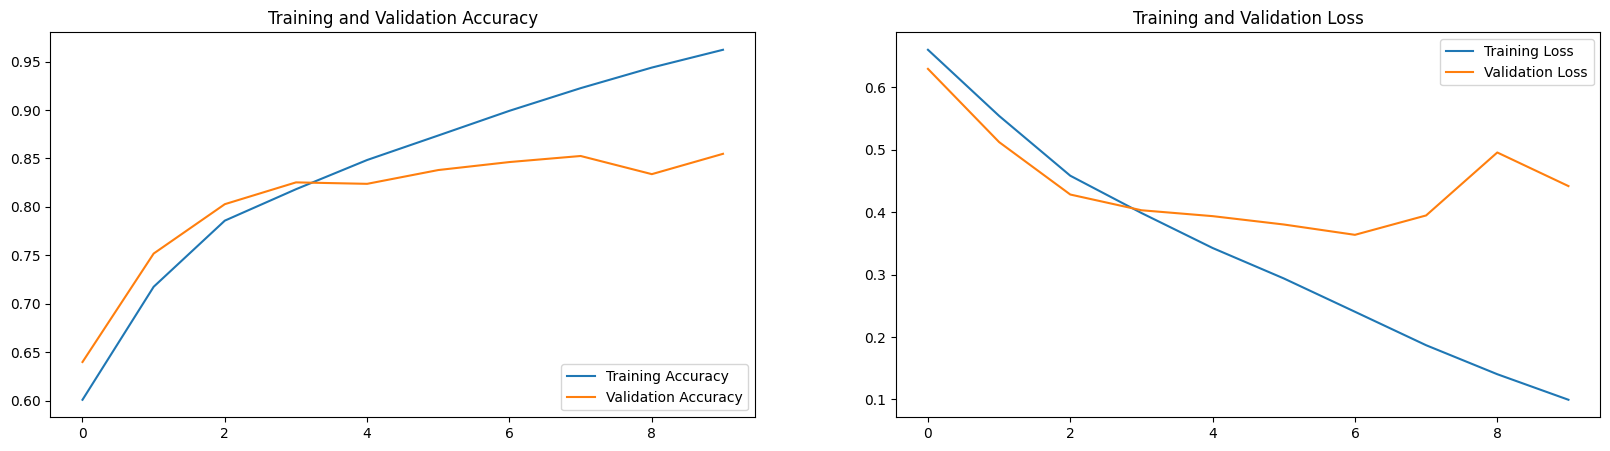

In [48]:
acc = histroy.history['accuracy']
val_acc = histroy.history['val_accuracy']
loss = histroy.history['loss']
val_loss = histroy.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model Evluation


## Initiating Test Generator

**Setting Up Data Generator for Test Data**

This code sets up an image data generator for the test dataset. The images are rescaled and read from the specified directory. The generator is configured with parameters such as target size, batch size, class mode, and shuffle behavior.

In [50]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

test_dir = '/content/dogs_vs_cats/test'  # Path to your test directory

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Should match the input size of your network
    batch_size=20,  # Can adjust based on your memory constraints
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    shuffle=False)  # No need to shuffle test data

Found 5000 images belonging to 2 classes.


## Making test predictions

**Calculating Test Steps for Test Dataset**

This code calculates the number of steps required to cover all samples in the test dataset, ensuring that all samples are included, even if they don't perfectly fit into batches.

In [51]:
np.ceil(test_generator.samples/test_generator.batch_size)

250.0

**Predicting Probabilities for Test Data**

This code uses the trained model to predict probabilities for the test dataset using the predict method. It specifies the number of steps needed to cover all samples in the test dataset.

In [52]:
probabilities = model.predict(test_generator,
                              steps=np.ceil(test_generator.samples/test_generator.batch_size))
probabilities

250/250 [==============================] - 72s 287ms/step


array([[9.8719482e-08],
       [8.8211120e-04],
       [1.1380300e-04],
       ...,
       [9.8928928e-01],
       [5.1888543e-01],
       [2.2836389e-01]], dtype=float32)

**Predicting Classes for Test Data with Thresholding**

This code resets the test generator, retrieves true class labels, predicts probabilities for the positive class using the trained model, and then thresholds these probabilities at 0.5 to determine the predicted classes. The output is an array of predicted classes, where each entry is either 0 or 1.

In [54]:
# Reset the test generator
test_generator.reset()

# Get the true labels
true_classes = test_generator.classes

# Predict probabilities for the positive class
probabilities = model.predict(test_generator,
                              steps=np.ceil(test_generator.samples/test_generator.batch_size))

# The output is the probability of the positive class,
# so we will threshold it at 0.5 to decide the predicted class
predicted_classes = (probabilities > 0.5).astype(int).squeeze()


# Class labels are just [0, 1] for binary classification, or you can use custom labels if you have them
class_labels = list(test_generator.class_indices.keys())
predicted_classes

250/250 [==============================] - 72s 287ms/step


array([0, 0, 0, ..., 1, 1, 0])

## Plotting confusion Matrix

**Visualizing Confusion Matrix for Binary Classification**

This code generates a confusion matrix using the true and predicted classes, and then visualizes it using a heatmap with seaborn. The confusion matrix helps evaluate the performance of a classification model by showing the counts of true positive, true negative, false positive, and false negative predictions.

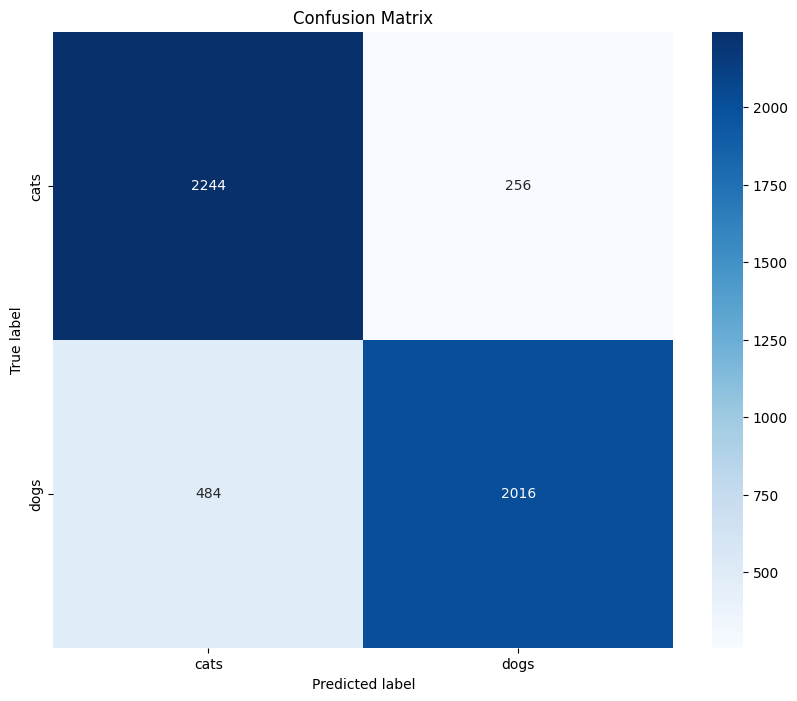

In [55]:
# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Inference

**Evaluating Model Performance on Test Data**

This code evaluates the performance of the trained model on the test dataset by calculating the loss and accuracy metrics using the evaluate method. It then prints the test accuracy and loss.

In [56]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Test loss: {loss:.2f}")

250/250 [==============================] - 80s 318ms/step - loss: 0.4516 - accuracy: 0.8520
Test accuracy: 85.20%
Test loss: 0.45


# Single Image Prediction

**Making and Visualizing Predictions for a Single Image**

This code defines a function make_prediction that takes the path to an image, preprocesses the image, makes a prediction using the trained model, and visualizes the original image alongside the predicted label.

In [57]:
def make_prediction(image_path):
    img = load_img(img_path, target_size=(150, 150))  # Resizing the image
    img_array = img_to_array(img)  # Converting to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.  # Rescale the image similarly as we did for the training data

    prediction = model.predict(img_array)
    print("Prediction:", prediction)

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Prediction
    plt.subplot(1, 2, 2)
    if prediction[0][0] > 0.5:
        plt.title('Predicted: Dog')
    else:
        plt.title('Predicted: Cat')
    plt.imshow(img)  # Show the same image as prediction
    plt.axis('off')

    plt.show()

1/1 [==============================] - 0s 56ms/step
Prediction: [[0.0027713]]


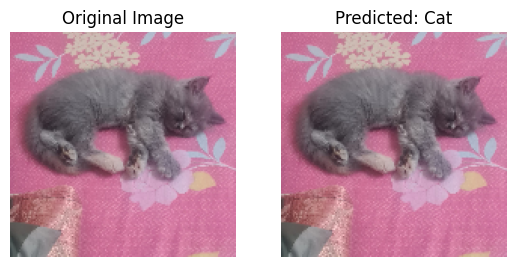

In [62]:
# Load and preprocess the image
img_path = '/content/meow.jpg'
make_prediction(img_path)

1/1 [==============================] - 0s 40ms/step
Prediction: [[0.99630153]]


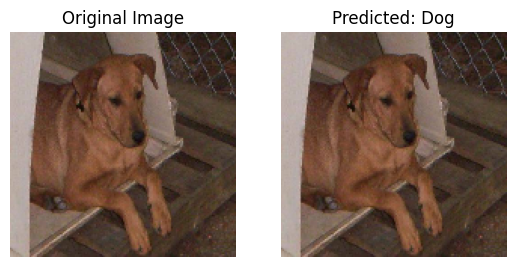

In [59]:
# Load and preprocess the image
img_path = '/content/dogs_vs_cats/test/dogs/dog.100.jpg'
make_prediction(img_path)

# MisClassifcaitons

**Predicting and Evaluating Misclassifications in the Test Set**

This code resets the test generator, makes predictions on the entire test dataset, converts the predicted probabilities to binary labels, and then identifies and counts the misclassified samples.

In [60]:
# Reset the test_generator before making predictions
test_generator.reset()

# Predict the whole test set
predictions = model.predict(test_generator, verbose=1)

# The predictions will be in the format of probabilities. You'll need to convert these to binary labels (0 or 1) based on a 0.5 threshold.
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)
true_classes = test_generator.classes
misclassified_indices = np.where(predicted_classes != true_classes)[0]
misclassified_count = len(misclassified_indices)
print(f"Total misclassifications in the test set: {misclassified_count} out of {len(true_classes)}")

250/250 [==============================] - 78s 309ms/step
Total misclassifications in the test set: 740 out of 5000


**Visualizing Misclassified Test Images**

This code generates predictions for the test dataset, identifies misclassified images, and displays a random subset of these misclassified images with their predicted labels.

250/250 [==============================] - 80s 319ms/step
Total misclassifications: 740


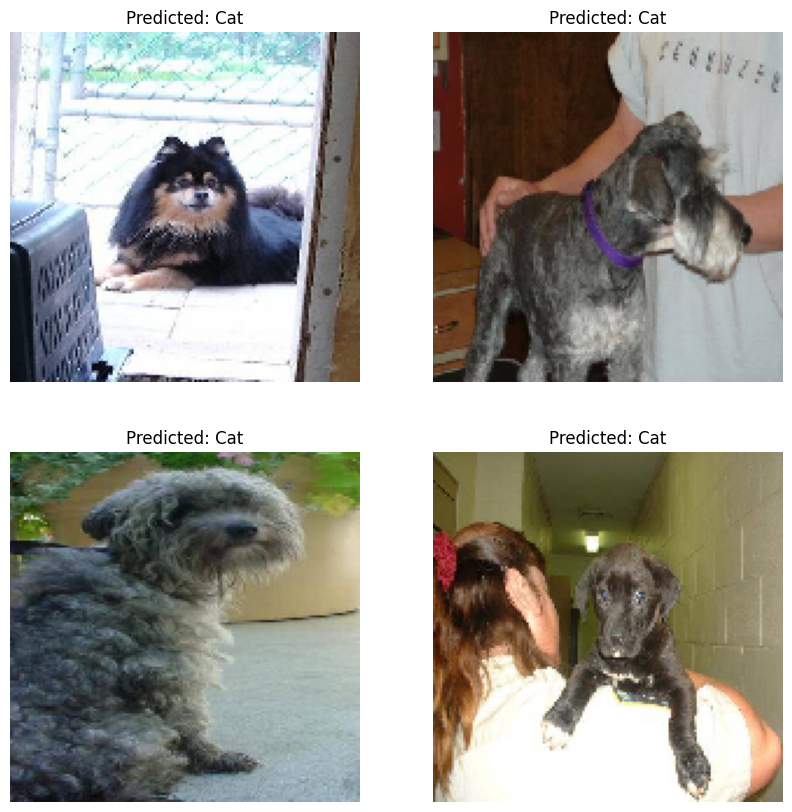

In [61]:
# Generate predictions for all test images
predictions = model.predict(test_generator)

# Convert predictions to binary (0 or 1) based on a 0.5 threshold
predicted_classes = predictions > 0.5

# Retrieve the true labels from the generator
true_classes = test_generator.classes

# Filenames can also be useful for debugging
filenames = test_generator.filenames

# Identifying indices of misclassified images
misclassified_indices = np.where(predicted_classes.flatten() != true_classes)[0]

# Print the total number of misclassifications
print(f"Total misclassifications: {len(misclassified_indices)}")

# Select a random subset of misclassified images to display
num_samples_to_display = 4
random_indices = random.sample(list(misclassified_indices), num_samples_to_display)

# Plot the misclassified images
plt.figure(figsize=(10, 10))
for i, index in enumerate(random_indices, 1):
    # Load image
    img_path = test_dir + '/' + filenames[index]
    img = load_img(img_path, target_size=(150, 150))

    # Predicted class
    predicted_class = "Dog" if predicted_classes[index] else "Cat"

    # Display the image with its predicted class
    plt.subplot(2, 2, i)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')

# Show the plot
plt.show()

# Visualising the kernel feature maps.

**Retrieving and Printing Convolutional Layer Filters in a Model**

This code iterates through all the layers of a neural network model, identifies convolutional layers, retrieves their filter weights, and prints the layer number, layer name, and shape of the filters.

In [63]:
# Iterate through all the layers in the model
for i in range(len(model.layers)):
    # Check if the layer is a convolutional layer
    if 'conv' not in model.layers[i].name:
        continue

    # Get the filter weights and biases of the convolutional layer
    filters, biases = model.layers[i].get_weights()

    # Print the layer number, layer name, and shape of the filters
    print("Layer number", i, model.layers[i].name, filters.shape)


Layer number 0 conv2d_26 (3, 3, 3, 32)
Layer number 2 conv2d_27 (3, 3, 32, 64)
Layer number 4 conv2d_28 (3, 3, 64, 128)
Layer number 6 conv2d_29 (3, 3, 128, 128)


In [64]:
# retrieve weights from the second hidden layer
filters , bias = model.layers[2].get_weights()

In [65]:
filters.shape, bias.shape

((3, 3, 32, 64), (64,))

In [66]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

**Visualizing Convolutional Filters of a Neural Network Layer**

This code visualizes a specified number of filters from a convolutional layer in a neural network. It creates subplots for each filter and its channels, and displays them in a grid.

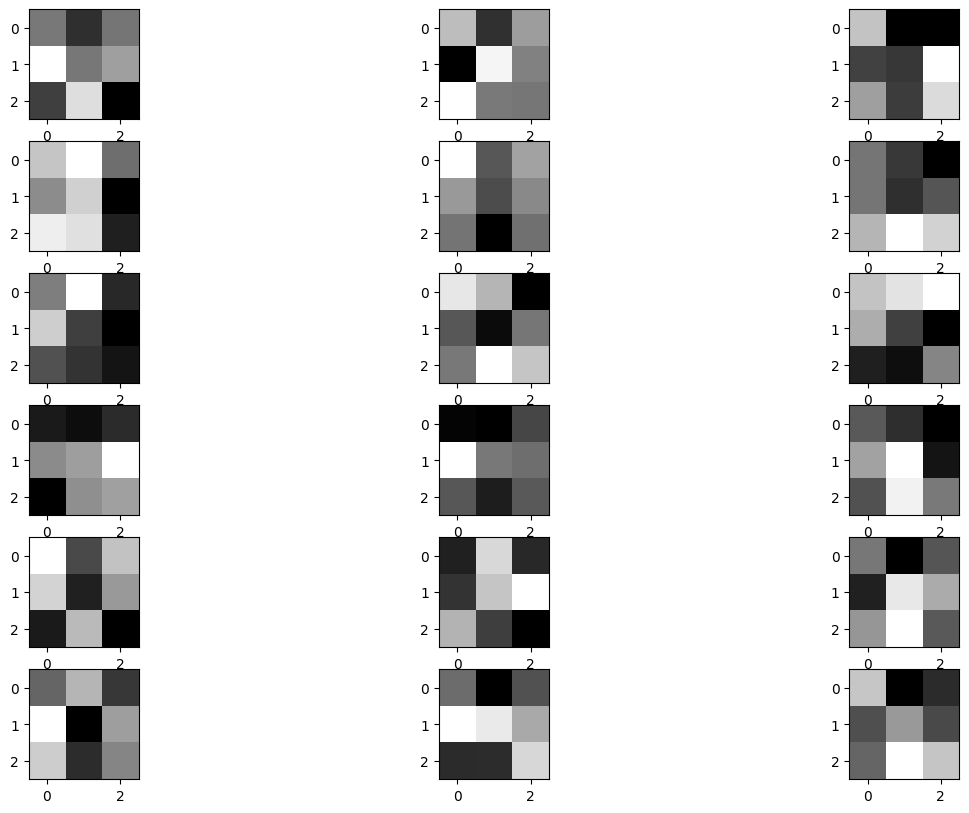

In [68]:
# Number of filters to visualize
n_filters = 6
# Subplot index
ix = 1
# Create a figure for the subplots
fig = plt.figure(figsize=(15, 10))

for i in range(n_filters):
    # Get the i-th filter (3D array) from the filters array
    f = filters[:, :, :, i]

    for j in range(3):  # Iterate over the 3 channels (RGB)
        # Create a subplot for each filter and channel combination
        plt.subplot(n_filters, 3, ix)
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1

# Plot the filters
plt.show()

**Visualizing Feature Maps from a Convolutional Layer**

This code visualizes the feature maps from the output of a specific layer in a pre-trained convolutional neural network (CNN). It loads an image, processes it, and uses a modified model to get the feature maps, which are then displayed in a grid format.

1/1 [==============================] - 0s 79ms/step


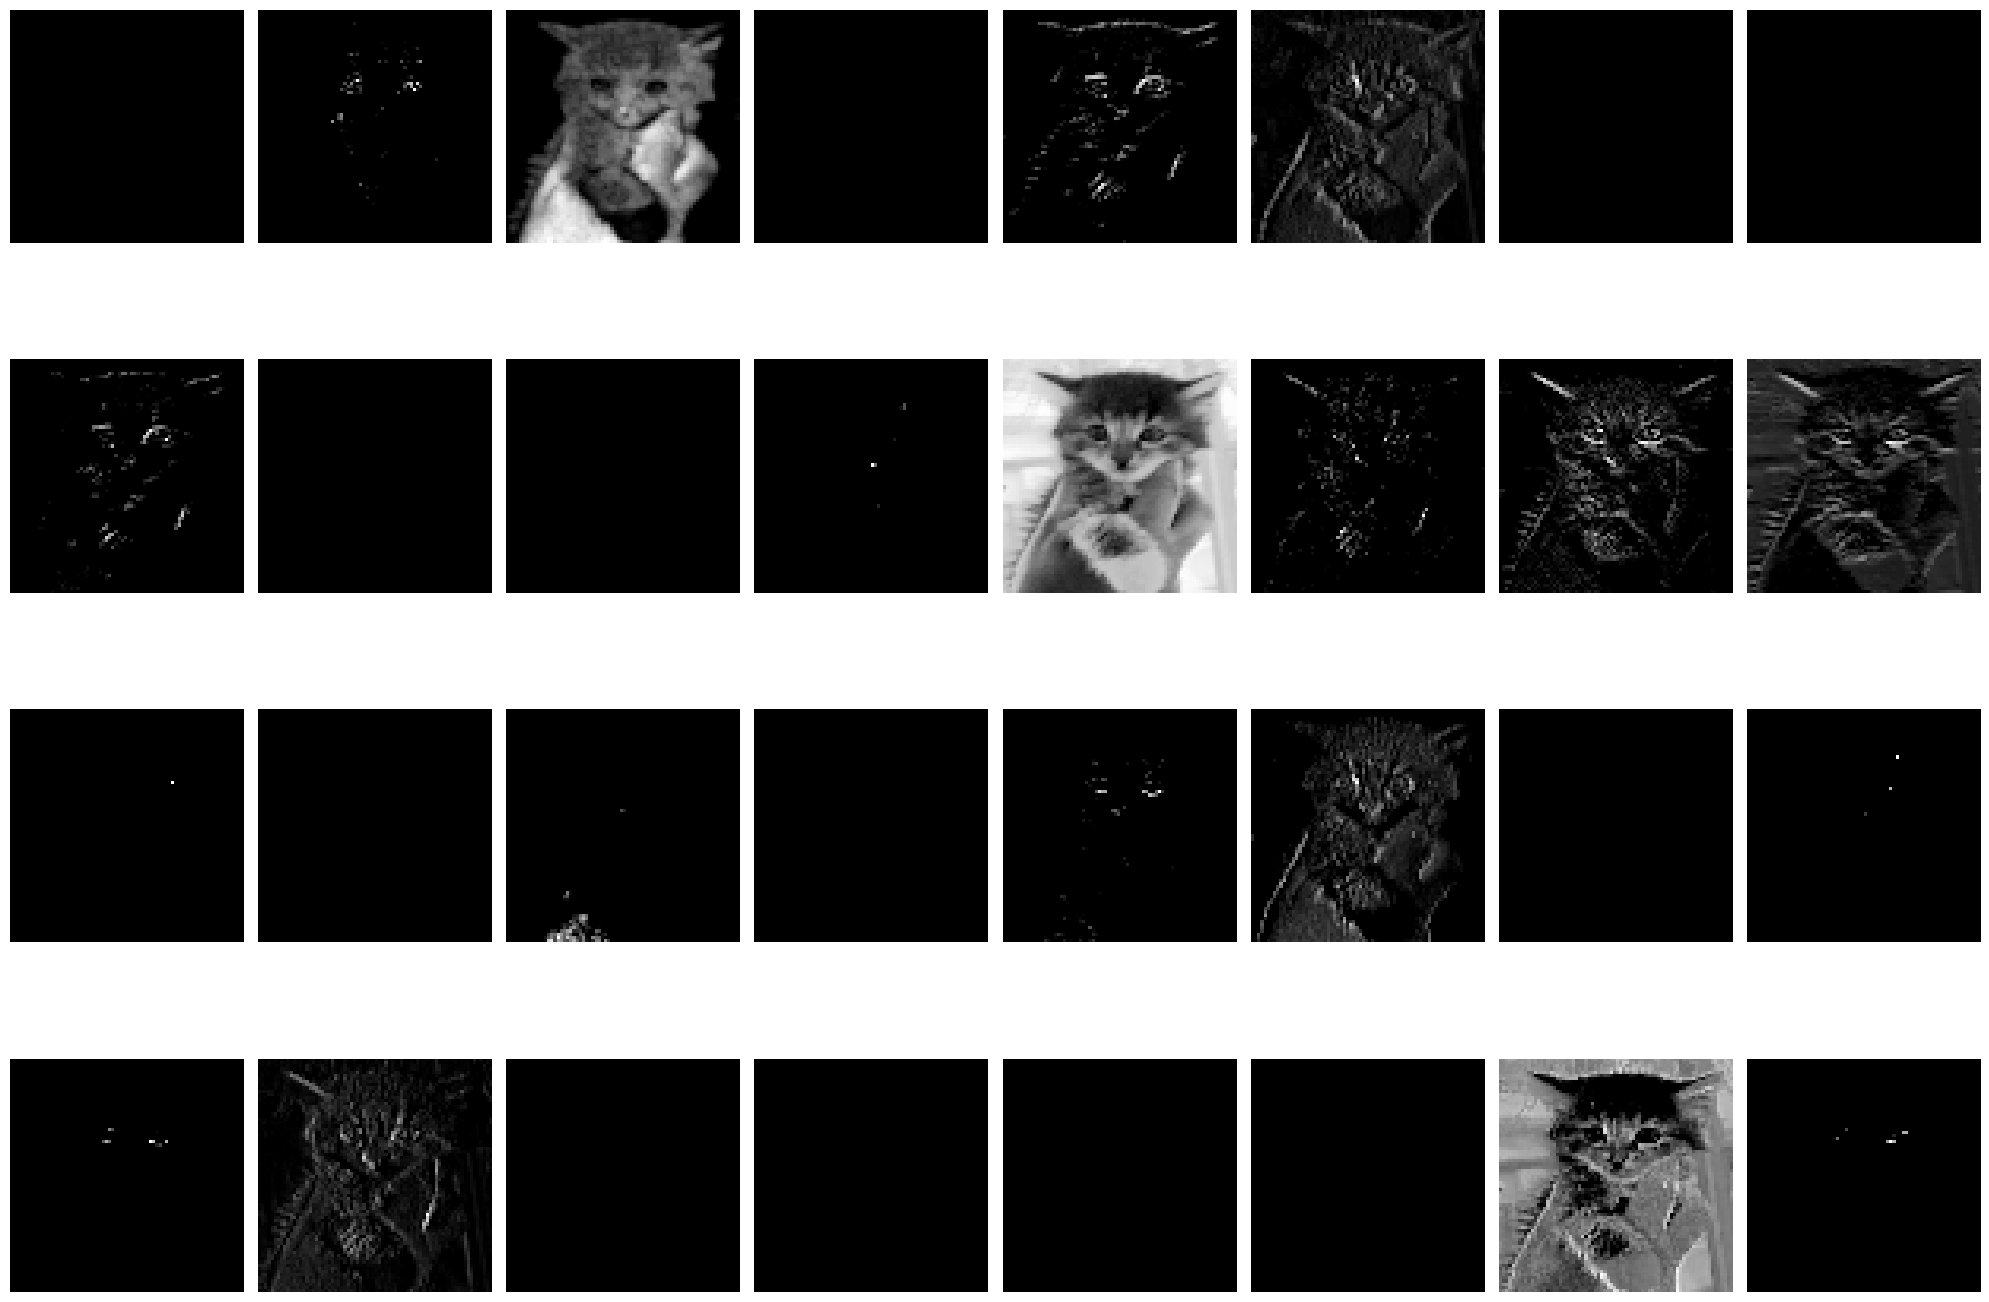

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

# Assuming 'model' is your pre-trained CNN model
# Creating a new model (model2) to get the output of the second layer
model2 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[1].output)

# Load and preprocess the image
image = load_img("/content/dogs_vs_cats/train/cats/cat.100.jpg", target_size=(150, 150))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.0  # Rescale image pixels to the range [0, 1]

# Predict using model2 to get the features from the desired layer
features = model2.predict(image)

# Calculate the number of feature maps
num_feature_maps = features.shape[-1]
num_cols = 8  # Number of columns in the grid
num_rows = num_feature_maps // num_cols + (1 if num_feature_maps % num_cols else 0)

# Create a figure for displaying the feature maps
fig = plt.figure(figsize=(20, 15))
for i in range(1, num_feature_maps + 1):
    # Add a subplot for each feature map
    ax = fig.add_subplot(num_rows, num_cols, i)
    ax.imshow(features[0, :, :, i-1], cmap='gray')
    plt.axis('off')  # Hide the axes for better visualization

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
